In [2]:
# Gamma Correction
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import spider image
spider = cv.imread('a1images/spider.png')
assert spider is not None
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(spider_hsv)

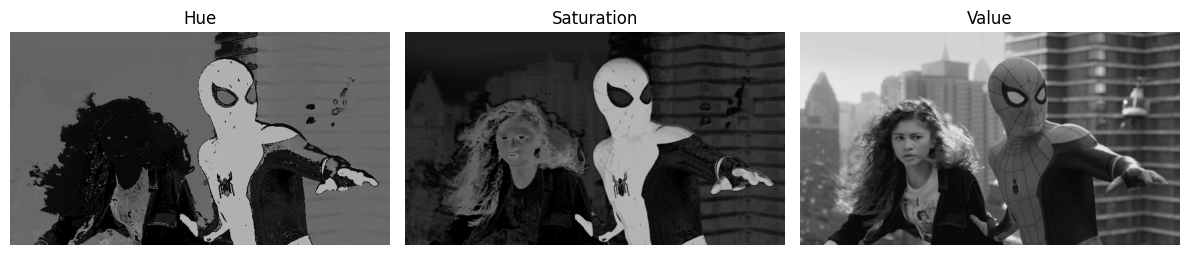

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

In [6]:
sigma = 70.0                 
a = 0.55               
center = 128.0              


x = np.arange(256, dtype=np.float32)

# f(x) = min( x + a * 128 * exp( - (x-128)^2 / (2*sigma^2) ), 255 )

fx = np.clip(x + a * 128.0 * np.exp(-((x - center) ** 2) / (2.0 * (sigma ** 2))), 0, 255)
lut = fx.astype(np.uint8)

# Apply to saturation only
S_enh = cv.LUT(S, lut)

# Merge
hsv_enh = cv.merge([H, S_enh, V])
rgb_enh = cv.cvtColor(hsv_enh, cv.COLOR_HSV2RGB)

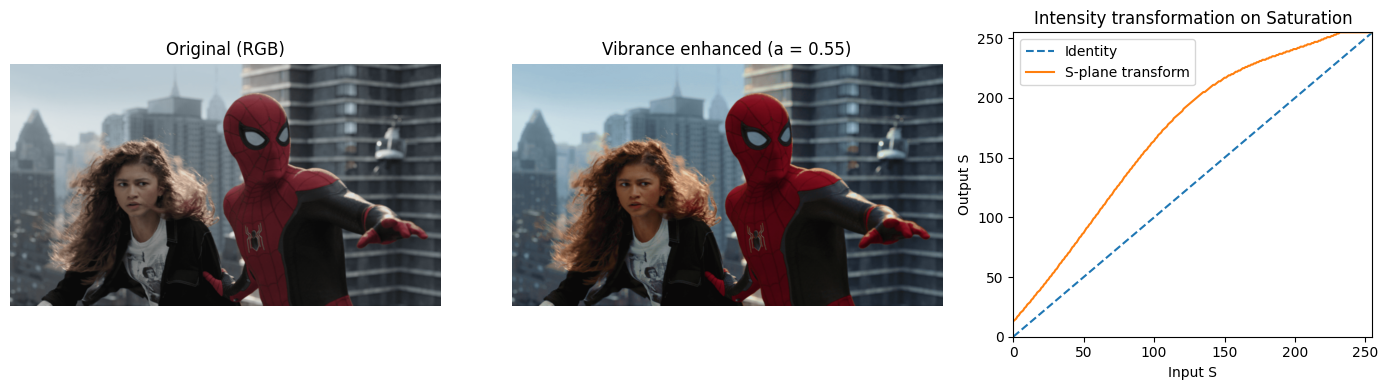

In [7]:
fig = plt.figure(figsize=(14, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1.2, 1.2, 1.0])

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(spider_rgb)
ax0.set_title("Original (RGB)")
ax0.axis('off')

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(rgb_enh)
ax1.set_title(f"Vibrance enhanced (a = {a:.2f})")
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(x, x, linestyle='--', label='Identity')
ax2.plot(x, lut, label='S-plane transform')
ax2.set_xlim(0, 255)
ax2.set_ylim(0, 255)
ax2.set_xlabel("Input S")
ax2.set_ylabel("Output S")
ax2.set_title("Intensity transformation on Saturation")
ax2.legend()

plt.tight_layout()
plt.show()